In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The SIR (Susceptible–Infected–Recovered) model is a classic compartmental model used in epidemiology to describe how an infectious disease spreads through a population over time. It divides individuals into three groups:  
- **S (Susceptible):** individuals who can contract the disease  
- **I (Infected):** individuals who currently carry and can transmit the disease  
- **R (Recovered):** individuals who have recovered and gained immunity (or are otherwise removed from transmission)  

In this project, we work with the standard SIR model and explore adjusted variants by modifying key parameters such as the transmission rate (β). These variants allow us to simulate different outbreak scenarios and compare how changes in disease characteristics or intervention strategies impact the spread.  

We implemented the SIR differential equations, solved them numerically using methods learned in class, and visualized the resulting dynamics over time. We analyzed how varying β modifies infection peaks, total cases, and the speed of disease spread. Through these simulations, we gained insight into the behavior of infectious diseases under different conditions and the sensitivity of epidemic outcomes to model parameters.

# SIR Euler Method (constant $\beta$)

In [3]:
beta=0.58
gamma=1/10

def SIR(i0,N,nbjours):


    # Creation of lists
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    # Initial Condition
    I[0]=i0
    S[0]=N-i0

    #Propagation
    for i in range(nbjours-1):
        S[i+1]=S[i]-beta*I[i]*S[i]/N
        I[i+1]=I[i]+beta*I[i]*S[i]/N - gamma*I[i]
        R[i+1]=R[i]+gamma*I[i]

    return S,I,R

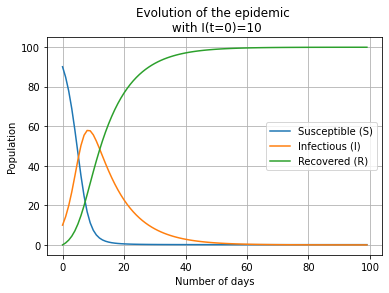

In [4]:
S,I,R=SIR(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n with I(t=0)={int(I[0])}")
plt.legend()
plt.grid(True)
plt.show()

# SIR RK2 Method (constant $\beta$)

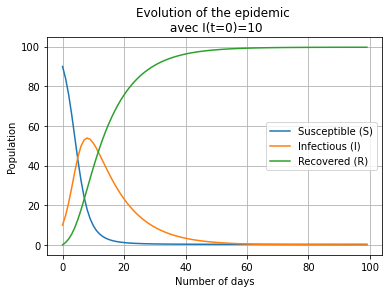

In [5]:
def SIRK2(i0,N,nbjours):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)

  # Initial Condition
  I[0]=i0
  S[0]=N-i0
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
      k1_R = gamma * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_I = (beta * S_k1 * I_k1) / N - gamma * I_k1 * dt
      k2_R = gamma * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

  return S, I, R


S,I,R=SIRK2(10,100,100)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic \n avec I(t=0)={int(I[0])}")
plt.legend()
plt.grid(True)
plt.show()

# SIR RK4 Method (constant $\beta$)

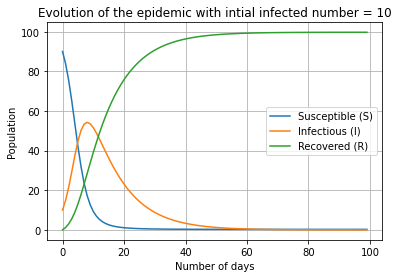

In [6]:
beta=0.58
gamma=1/10

def SIRK4(i0,N,nbjours):

    dt = 1
    S=np.zeros(nbjours)
    I=np.zeros(nbjours)
    R=np.zeros(nbjours)

    I[0]=i0
    S[0]=N-i0
    R[0]=0
    
    for i in range(nbjours - 1):
        
        #k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_I = ((beta * S[i] * I[i]) / N - gamma * I[i] ) * dt
        k1_R = gamma * I[i] * dt
        
        S_k1 = S[i] + k1_S
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R
        
        #k2
        S_k2 = S[i] + 0.5 * k1_S
        I_k2 = I[i] + 0.5 * k1_I
        R_k2 = R[i] + 0.5 * k1_R
        
        k2_S = (-beta * S_k2 * I_k2) / N * dt
        k2_I = ((beta * S_k2 * I_k2) / N - gamma * I_k2 ) * dt
        k2_R = gamma * I_k2 * dt
        
        #k3
        S_k3 = S[i] + 0.5 * k2_S
        I_k3 = I[i] + 0.5 * k2_I
        R_k3 = R[i] + 0.5 * k2_R
        
        k3_S = (-beta * S_k3 * I_k3) / N * dt
        k3_I = ((beta * S_k3 * I_k3) / N - gamma * I_k3 ) * dt
        k3_R = gamma * I_k3 * dt
        
        #k4
        S_k4 = S[i] + k3_S
        I_k4 = I[i] + k3_I
        R_k4 = R[i] + k3_R
        
        k4_S = (-beta * S_k4 * I_k4) / N * dt
        k4_I = ((beta * S_k4 * I_k4) / N - gamma * I_k4 ) * dt
        k4_R = gamma * I_k4 * dt
        
        #finding n+1
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, I, R

N = 100
i0 = 10
nbjours = 100

S,I,R=SIRK4(i0, N, nbjours)
plt.plot(S,label="Susceptible (S)")
plt.plot(I,label="Infectious (I)")
plt.plot(R,label="Recovered (R)")
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with intial infected number = 10")
plt.legend()
plt.grid(True)
plt.show()

# SEIRD Euler Method (constant $\beta$)

In [7]:
def seird_model(i0, N, nbday, beta, sigma, gamma, mu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]

    return S, E, I, R, D

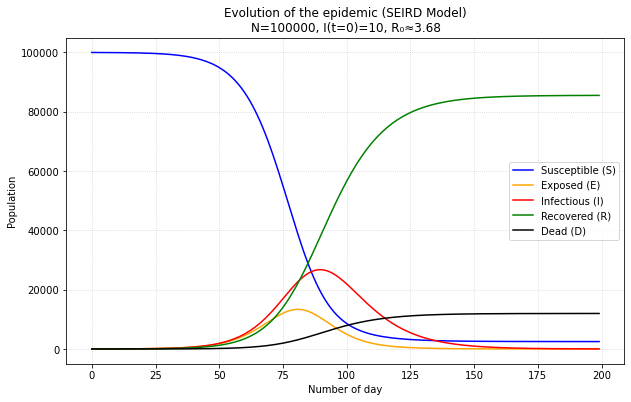

In [8]:
#Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

#Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

#Run the SEIRD simulation
S, E, I, R, D = seird_model(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRD RK2 Method (constant $\beta$)

In [9]:
def SEIRDRK2(i0, N,nbjours, beta, sigma, gamma, mu, e0=0):

  dt = 1
  # Creation of lists
  S=np.zeros(nbjours)
  E=np.zeros(nbjours)
  I=np.zeros(nbjours)
  R=np.zeros(nbjours)
  D=np.zeros(nbjours)

 # Initial Condition
  I[0] = i0
  E[0] = e0
  R[0] = 0
  D[0] = 0
  S[0] = N - i0 - e0 - R[0] - D[0] # Total must sum to N
  for i in range(nbjours - 1):
      #k1
      k1_S = (-beta * S[i] * I[i]) / N * dt
      k1_E = (beta * I[i] * S[i] / N - sigma * E[i] )  * dt
      k1_I = (sigma * E[i] - gamma * I[i] - mu * I[i]) * dt
      k1_R = gamma * I[i] * dt
      k1_D = mu * I[i] * dt

      #Un + k1

      S_k1 = S[i] + k1_S
      E_k1 = E[i] + k1_E
      I_k1 = I[i] + k1_I
      R_k1 = R[i] + k1_R
      D_k1 = D[i] + k1_D

      #k2
      k2_S = (-beta * S_k1 * I_k1) / N * dt
      k2_E = (beta * I_k1 *  S_k1 / N - sigma * E_k1)     * dt
      k2_I = ((beta * S_k1 * I_k1) / N - gamma * I_k1) * dt
      k2_R = gamma * I_k1 * dt
      k2_D = mu * I_k1 * dt

      #Un+1
      S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
      E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
      I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
      R[i+1] = R[i] + 0.5 * (k1_R + k2_R)
      D[i+1] = E[i] + 0.5 * (k1_D + k2_D)

  return S,E,I,R,D

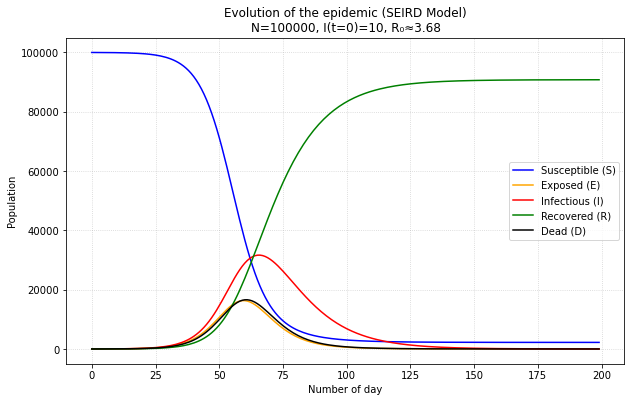

In [10]:
#Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

#Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

#Run the SEIRD simulation
S, E, I, R, D = SEIRDRK2(i_initial, N_total, days, beta, sigma, gamma, mu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRD Model)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR Model

SEIR model: For many important infections, there is a significant latency period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed). (Wikipedia)  
We add another ODE for E:  
> $\frac{dE}{dt} = \frac{\beta I S}{N} - (\mu + a)E$  

and a is defined as: the latency period is a random variable with exponential distribution with parameter 
a (i.e. the average latency period is $a^{-1}$) (Wikipedia)

# SEIR Euler Method (constant $\beta$)

In [11]:
def seir_model(i0, N, nbday, beta, sigma, gamma, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    # Propagation
    for i in range(nbday - 1):

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]

    return S, E, I, R

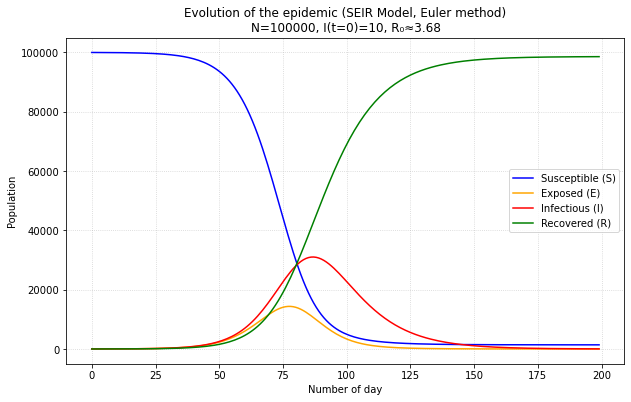

In [12]:
# Define Parameters and Initial Conditions
N_total = 100000 # Total population
i_initial = 10   # Initial infected (I0)
e_initial = 10   # Initial exposed (E0)
days = 200       # Number of days to simulate

# Model Parameters (Random Values)
beta = 0.3      # Transmission rate (R0 = beta / (gamma + mu))
sigma = 1/5     # Incubation rate (1/incubation period, e.g., 5 days)
gamma = 1/14    # Recovery rate (1/recovery period, e.g., 14 days)
mu = 0.01       # Mortality rate

# Run the SEIRD simulation
S, E, I, R = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.xlabel("Number of day")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK2 Method (constant $\beta$)

In [13]:
def SEIRRK2(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]   # Total must sum to N

    for i in range(nbjours - 1):

        # k1
        k1_S = (-beta * S[i] * I[i]) / N * dt
        k1_E = (beta * I[i] * S[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1
        S_k1 = S[i] + k1_S
        E_k1 = E[i] + k1_E
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R

        # k2
        k2_S = (-beta * S_k1 * I_k1) / N * dt
        k2_E = (beta * I_k1 * S_k1 / N - sigma * E_k1) * dt
        k2_I = (sigma * E_k1 - gamma * I_k1) * dt
        k2_R = (gamma * I_k1) * dt

        # U(n+1)
        S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
        E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
        I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

    return S, E, I, R

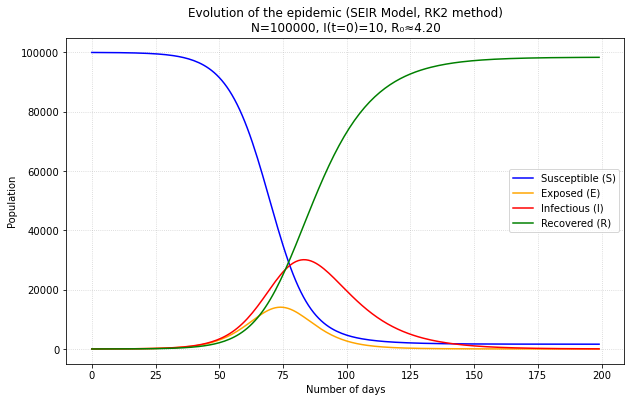

In [14]:
#Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

# Run the SEIR simulation
S, E, I, R = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK2 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIR RK4 Method (constant $\beta$)

In [15]:
def SEIRRK4(i0, N, nbjours, beta, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta * S[i] * I[i] / N) * dt
        k1_E = (beta * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5 * k1_S
        E1 = E[i] + 0.5 * k1_E
        I1 = I[i] + 0.5 * k1_I
        R1 = R[i] + 0.5 * k1_R

        # --- k2 ---
        k2_S = (-beta * S1 * I1 / N) * dt
        k2_E = (beta * S1 * I1 / N - sigma * E1) * dt
        k2_I = (sigma * E1 - gamma * I1) * dt
        k2_R = (gamma * I1) * dt

        # U + k2/2
        S2 = S[i] + 0.5 * k2_S
        E2 = E[i] + 0.5 * k2_E
        I2 = I[i] + 0.5 * k2_I
        R2 = R[i] + 0.5 * k2_R

        # --- k3 ---
        k3_S = (-beta * S2 * I2 / N) * dt
        k3_E = (beta * S2 * I2 / N - sigma * E2) * dt
        k3_I = (sigma * E2 - gamma * I2) * dt
        k3_R = (gamma * I2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R

        # --- k4 ---
        k4_S = (-beta * S3 * I3 / N) * dt
        k4_E = (beta * S3 * I3 / N - sigma * E3) * dt
        k4_I = (sigma * E3 - gamma * I3) * dt
        k4_R = (gamma * I3) * dt

        # --- Update (RK4 formula) ---
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, E, I, R

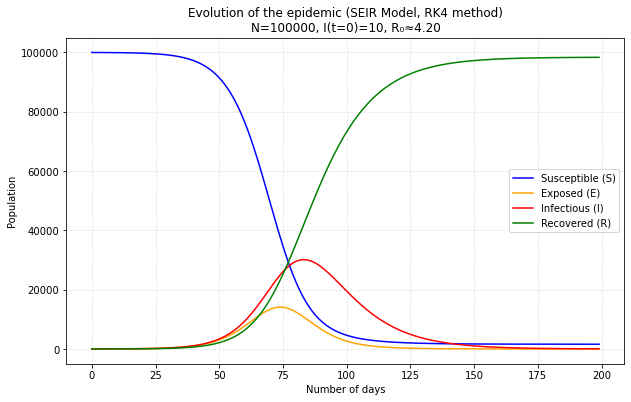

In [16]:
#Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3
sigma = 1/5
gamma = 1/14

#Run the SEIR simulation
S, E, I, R = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIR Model, RK4 method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/gamma:.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Comparing SEIR numerical methods

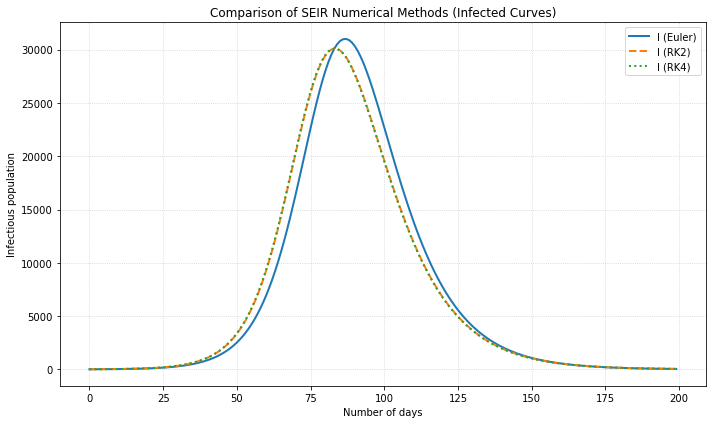

In [17]:
S_eu, E_eu, I_eu, R_eu = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
S_rk2, E_rk2, I_rk2, R_rk2 = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
S_rk4, E_rk4, I_rk4, R_rk4 = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of days")
plt.ylabel("Infectious population")
plt.title("Comparison of SEIR Numerical Methods (Infected Curves)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Comparing efficiencies (runtimes)
import time

# Euler
t0 = time.time()
S_eu, E_eu, I_eu, R_eu = seir_model(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_eu = time.time() - t0

# RK2
t0 = time.time()
S_rk2, E_rk2, I_rk2, R_rk2 = SEIRRK2(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_rk2 = time.time() - t0

# RK4
t0 = time.time()
S_rk4, E_rk4, I_rk4, R_rk4 = SEIRRK4(i_initial, N_total, days, beta, sigma, gamma, e0=e_initial)
t_rk4 = time.time() - t0

print(f"Euler method: {t_eu:.6f} s")
print(f"RK2 method:   {t_rk2:.6f} s")
print(f"RK4 method:   {t_rk4:.6f} s")

Euler method: 0.001972 s
RK2 method:   0.003584 s
RK4 method:   0.005233 s


# SEIRDV Model

SEIRDV model: we add deceased and vaccinated rates to the SEIR model. We use $\mu$ as our fatality rate (attached to D) and $\nu$ as our vaccination rate (attached to V).  
New ODEs added are simply:  
>$\frac{dV}{dt} = \nu S$  
$\frac{dD}{dt} = \mu I$

# SEIRDV Euler Method (constant $\beta$)

In [20]:
def seirdv_model(i0, N, nbday, beta, sigma, gamma, mu, nu, e0=0):

    # Creation of lists
    S = np.zeros(nbday)
    E = np.zeros(nbday)
    I = np.zeros(nbday)
    R = np.zeros(nbday)
    D = np.zeros(nbday)
    V = np.zeros(nbday)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0 - R[0] - D[0] - V[0]

    # Propagation
    for i in range(nbday - 1):

        # Force of infection
        infection = beta * I[i] * S[i] / N

        # Updates
        S[i+1] = S[i] - infection - nu * S[i]
        E[i+1] = E[i] + infection - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i] - mu * I[i]
        R[i+1] = R[i] + gamma * I[i]
        D[i+1] = D[i] + mu * I[i]
        V[i+1] = V[i] + nu * S[i]

    return S, E, I, R, D, V

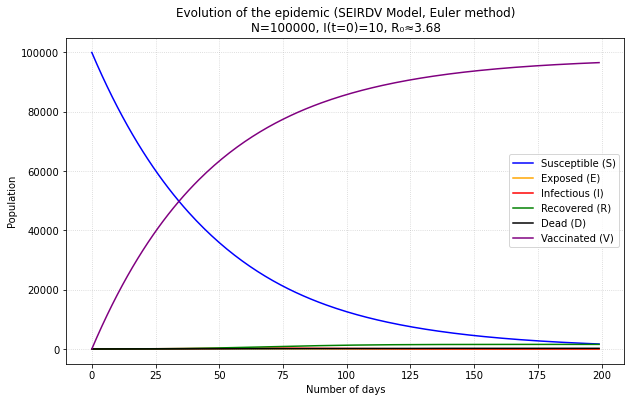

In [21]:
# Define Parameters and Initial Conditions
N_total = 100000  # Total population
i_initial = 10    # Initial infected (I0)
e_initial = 10    # Initial exposed (E0)
days = 200        # Number of days to simulate

# Model Parameters
beta = 0.3        # Transmission rate
sigma = 1/5       # Incubation rate
gamma = 1/14      # Recovery rate
mu = 0.01         # Mortality rate
nu = 0.02         # Vaccination rate

# Run the SEIRDV simulation
S, E, I, R, D, V = seirdv_model(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)", color='blue')
plt.plot(E, label="Exposed (E)", color='orange')
plt.plot(I, label="Infectious (I)", color='red')
plt.plot(R, label="Recovered (R)", color='green')
plt.plot(D, label="Dead (D)", color='black')
plt.plot(V, label="Vaccinated (V)", color='purple')

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic (SEIRDV Model, Euler method)\nN={N_total}, I(t=0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK2 Method (constant $\beta$)

In [22]:
def SEIRDV_RK2(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1
        S1 = S[i] + k1_S
        E1 = E[i] + k1_E
        I1 = I[i] + k1_I
        R1 = R[i] + k1_R
        D1 = D[i] + k1_D
        V1 = V[i] + k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # Combine (RK2 = midpoint)
        S[i+1] = S[i] + 0.5*(k1_S + k2_S)
        E[i+1] = E[i] + 0.5*(k1_E + k2_E)
        I[i+1] = I[i] + 0.5*(k1_I + k2_I)
        R[i+1] = R[i] + 0.5*(k1_R + k2_R)
        D[i+1] = D[i] + 0.5*(k1_D + k2_D)
        V[i+1] = V[i] + 0.5*(k1_V + k2_V)

    return S, E, I, R, D, V

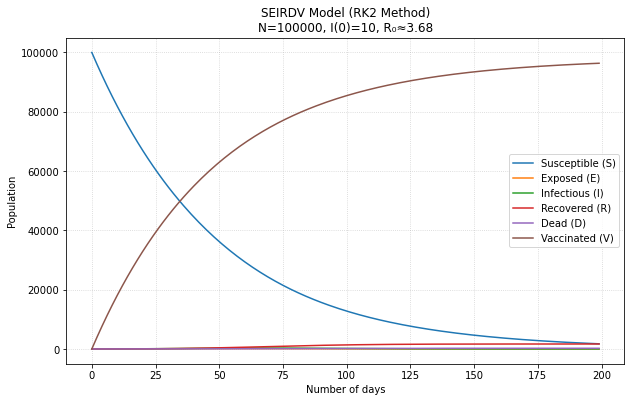

In [23]:
# Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# Run the SEIRDV RK2 simulation
S, E, I, R, D, V = SEIRDV_RK2(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK2 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# SEIRDV RK4 Method (constant $\beta$)

In [24]:
def SEIRDV_RK4(i0, N, nbjours, beta, sigma, gamma, mu, nu, e0=0):

    dt = 1
    # Lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)
    D = np.zeros(nbjours)
    V = np.zeros(nbjours)

    # Initial conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    D[0] = 0
    V[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        # --- k1 ---
        k1_S = (-beta*S[i]*I[i]/N - nu*S[i]) * dt
        k1_E = (beta*S[i]*I[i]/N - sigma*E[i]) * dt
        k1_I = (sigma*E[i] - gamma*I[i] - mu*I[i]) * dt
        k1_R = (gamma*I[i]) * dt
        k1_D = (mu*I[i]) * dt
        k1_V = (nu*S[i]) * dt

        # U + k1/2
        S1 = S[i] + 0.5*k1_S
        E1 = E[i] + 0.5*k1_E
        I1 = I[i] + 0.5*k1_I
        R1 = R[i] + 0.5*k1_R
        D1 = D[i] + 0.5*k1_D
        V1 = V[i] + 0.5*k1_V

        # --- k2 ---
        k2_S = (-beta*S1*I1/N - nu*S1) * dt
        k2_E = (beta*S1*I1/N - sigma*E1) * dt
        k2_I = (sigma*E1 - gamma*I1 - mu*I1) * dt
        k2_R = (gamma*I1) * dt
        k2_D = (mu*I1) * dt
        k2_V = (nu*S1) * dt

        # U + k2/2
        S2 = S[i] + 0.5*k2_S
        E2 = E[i] + 0.5*k2_E
        I2 = I[i] + 0.5*k2_I
        R2 = R[i] + 0.5*k2_R
        D2 = D[i] + 0.5*k2_D
        V2 = V[i] + 0.5*k2_V

        # --- k3 ---
        k3_S = (-beta*S2*I2/N - nu*S2) * dt
        k3_E = (beta*S2*I2/N - sigma*E2) * dt
        k3_I = (sigma*E2 - gamma*I2 - mu*I2) * dt
        k3_R = (gamma*I2) * dt
        k3_D = (mu*I2) * dt
        k3_V = (nu*S2) * dt

        # U + k3
        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R
        D3 = D[i] + k3_D
        V3 = V[i] + k3_V

        # --- k4 ---
        k4_S = (-beta*S3*I3/N - nu*S3) * dt
        k4_E = (beta*S3*I3/N - sigma*E3) * dt
        k4_I = (sigma*E3 - gamma*I3 - mu*I3) * dt
        k4_R = (gamma*I3) * dt
        k4_D = (mu*I3) * dt
        k4_V = (nu*S3) * dt

        # Combine (RK4)
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E)/6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R)/6
        D[i+1] = D[i] + (k1_D + 2*k2_D + 2*k3_D + k4_D)/6
        V[i+1] = V[i] + (k1_V + 2*k2_V + 2*k3_V + k4_V)/6

    return S, E, I, R, D, V

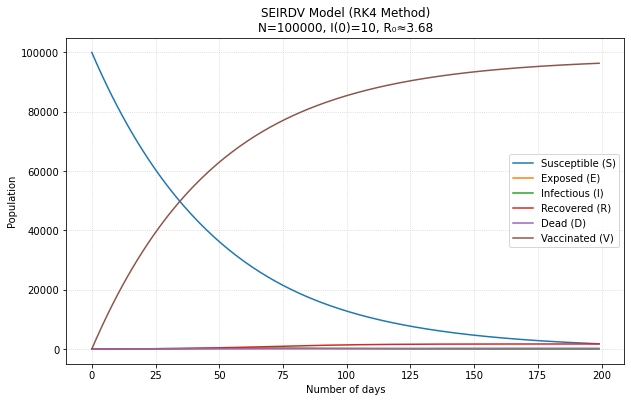

In [25]:
# Define Parameters and Initial Conditions
N_total = 100000
i_initial = 10
e_initial = 10
days = 200

# Model parameters
beta = 0.3
sigma = 1/5
gamma = 1/14
mu = 0.01
nu = 0.02

# Run the SEIRDV RK4 simulation
S, E, I, R, D, V = SEIRDV_RK4(i_initial, N_total, days, beta, sigma, gamma, mu, nu, e0=e_initial)

plt.figure(figsize=(10, 6))

plt.plot(S, label="Susceptible (S)")
plt.plot(E, label="Exposed (E)")
plt.plot(I, label="Infectious (I)")
plt.plot(R, label="Recovered (R)")
plt.plot(D, label="Dead (D)")
plt.plot(V, label="Vaccinated (V)")

plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"SEIRDV Model (RK4 Method)\nN={N_total}, I(0)={int(I[0])}, R₀≈{beta/(gamma+mu):.2f}")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Gaussian time-dependent $\beta$

Using data from: Setianto, S., Hidayat, D. Modeling the time-dependent transmission rate using gaussian pulses for analyzing the COVID-19 outbreaks in the world. Sci Rep 13, 4466 (2023). https://doi.org/10.1038/s41598-023-31714-5

# SIR Gaussian $\beta$(t), RK4 method #

In [26]:
gamma=1/10

#defining beta as a function of time as a gaussian distribution (from the article on Github)
#r_m, t_m, d_m from article are gauss_height, t_centers, gauss_width

def make_beta_func(gauss_height, t_centers, gauss_width):
    gauss_height = np.asarray(gauss_height, dtype=float)
    t_centers = np.asarray(t_centers, dtype=float)
    gauss_width = np.asarray(gauss_width, dtype=float)

    def beta(t):
        return np.sum(
            gauss_height * np.exp(-((t - t_centers)**2) / (gauss_width**2))
        )

    return beta

In [27]:
def SIRK4_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        # beta values for RK4 stages
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # k2
        S2 = S[i] + 0.5 * dt * k1_S
        I2 = I[i] + 0.5 * dt * k1_I
        R2 = R[i] + 0.5 * dt * k1_R

        k2_S = (-b2 * S2 * I2) / N
        k2_I = (b2 * S2 * I2) / N - gamma * I2
        k2_R = gamma * I2

        # k3
        S3 = S[i] + 0.5 * dt * k2_S
        I3 = I[i] + 0.5 * dt * k2_I
        R3 = R[i] + 0.5 * dt * k2_R

        k3_S = (-b3 * S3 * I3) / N
        k3_I = (b3 * S3 * I3) / N - gamma * I3
        k3_R = gamma * I3

        # k4
        S4 = S[i] + dt * k3_S
        I4 = I[i] + dt * k3_I
        R4 = R[i] + dt * k3_R

        k4_S = (-b4 * S4 * I4) / N
        k4_I = (b4 * S4 * I4) / N - gamma * I4
        k4_R = gamma * I4

        # Update
        S[i+1] = S[i] + dt*(k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        I[i+1] = I[i] + dt*(k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + dt*(k1_R + 2*k2_R + 2*k3_R + k4_R)/6

    return S, I, R

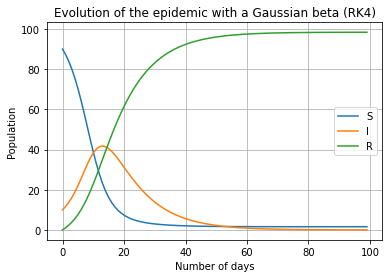

In [28]:
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]

beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with a Gaussian beta (RK4)")
plt.show()

# SIR Gaussian $\beta$(t), RK2 method #

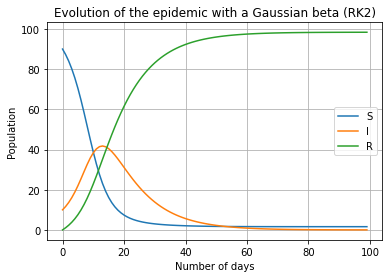

In [29]:
def SIRK2_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # midpoint estimates
        S_mid = S[i] + 0.5 * dt * k1_S
        I_mid = I[i] + 0.5 * dt * k1_I
        R_mid = R[i] + 0.5 * dt * k1_R

        b_mid = beta_func(t + 0.5 * dt)

        # k2 (midpoint slope)
        k2_S = (-b_mid * S_mid * I_mid) / N
        k2_I = (b_mid * S_mid * I_mid) / N - gamma * I_mid
        k2_R = gamma * I_mid

        # Update (RK2)
        S[i+1] = S[i] + dt * k2_S
        I[i+1] = I[i] + dt * k2_I
        R[i+1] = R[i] + dt * k2_R

    return S, I, R


# Parameters
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]

beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a Gaussian beta (RK2)")
plt.show()

# SIR Gaussian $\beta$(t), Modified Euler method #

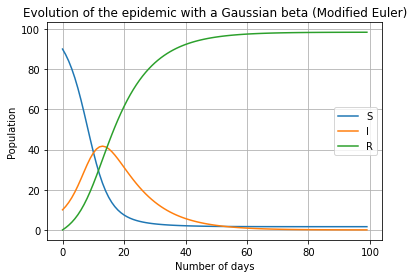

In [30]:
def SIR_modified_euler(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # Modified Euler implementation
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        S_pred = S[i] + dt * k1_S
        I_pred = I[i] + dt * k1_I
        R_pred = R[i] + dt * k1_R

        b2 = beta_func(t + dt)

        # updating
        k2_S = (-b2 * S_pred * I_pred) / N
        k2_I = (b2 * S_pred * I_pred) / N - gamma * I_pred
        k2_R = gamma * I_pred

        S[i+1] = S[i] + 0.5 * dt * (k1_S + k2_S)
        I[i+1] = I[i] + 0.5 * dt * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * dt * (k1_R + k2_R)

    return S, I, R


# Parameters
N = 100
i0 = 10
nbjours = 100

gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]


beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

S, I, R = SIR_modified_euler(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a Gaussian beta (Modified Euler)")
plt.show()

# Comparing numerical methods for a Gaussian $\beta$

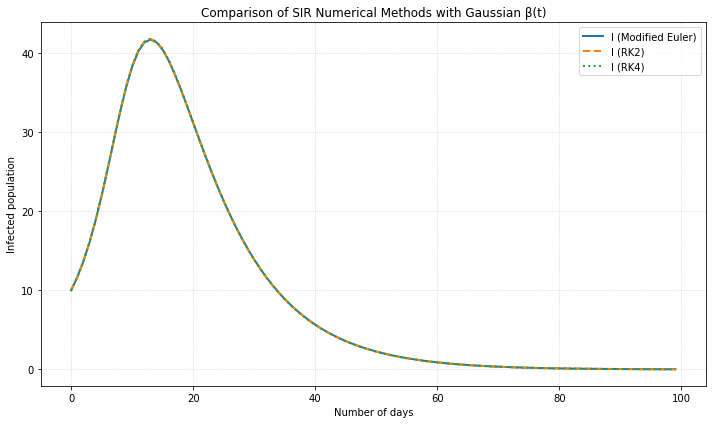

In [31]:
S_eu, I_eu, R_eu = SIR_modified_euler(i0, N, nbjours, beta_func)
S_rk2, I_rk2, R_rk2 = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)
S_rk4, I_rk4, R_rk4 = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Modified Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of days")
plt.ylabel("Infected population")
plt.title("Comparison of SIR Numerical Methods with Gaussian β(t)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Comparing three methods' efficiency

In [32]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, I, R = solver(i0, N, nbjours, beta_func)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SIRK4_time_dependent_beta)
time_solver("RK2", SIRK2_time_dependent_beta)
time_solver("Modified Euler", SIR_modified_euler)

RK4 time: 0.009117 seconds
RK2 time: 0.003620 seconds
Modified Euler time: 0.002297 seconds


# SEIR Gaussian $\beta$(t)

Using same beta from article, same $r_m, t_m, d_m$ data, just modified to fit an SEIR model

# SEIR Gaussian $\beta(t)$, RK4 method

In [33]:
def SEIRRK4_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    dt = 1
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0

    for i in range(nbjours - 1):

        t = i * dt
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # ----- k1 -----
        k1_S = (-b1 * S[i] * I[i] / N) * dt
        k1_E = (b1 * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        S1 = S[i] + 0.5 * k1_S
        E1 = E[i] + 0.5 * k1_E
        I1 = I[i] + 0.5 * k1_I
        R1 = R[i] + 0.5 * k1_R

        # ----- k2 -----
        k2_S = (-b2 * S1 * I1 / N) * dt
        k2_E = (b2 * S1 * I1 / N - sigma * E1) * dt
        k2_I = (sigma * E1 - gamma * I1) * dt
        k2_R = (gamma * I1) * dt

        S2 = S[i] + 0.5 * k2_S
        E2 = E[i] + 0.5 * k2_E
        I2 = I[i] + 0.5 * k2_I
        R2 = R[i] + 0.5 * k2_R

        # ----- k3 -----
        k3_S = (-b3 * S2 * I2 / N) * dt
        k3_E = (b3 * S2 * I2 / N - sigma * E2) * dt
        k3_I = (sigma * E2 - gamma * I2) * dt
        k3_R = (gamma * I2) * dt

        S3 = S[i] + k3_S
        E3 = E[i] + k3_E
        I3 = I[i] + k3_I
        R3 = R[i] + k3_R

        # ----- k4 -----
        k4_S = (-b4 * S3 * I3 / N) * dt
        k4_E = (b4 * S3 * I3 / N - sigma * E3) * dt
        k4_I = (sigma * E3 - gamma * I3) * dt
        k4_R = (gamma * I3) * dt

        # Update
        S[i+1] = S[i] + (k1_S + 2*k2_S + 2*k3_S + k4_S) / 6
        E[i+1] = E[i] + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
        I[i+1] = I[i] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6
        R[i+1] = R[i] + (k1_R + 2*k2_R + 2*k3_R + k4_R) / 6

    return S, E, I, R

In [34]:
N = 100000
i0 = 10
e0 = 5
nbjours = 200

# Gaussian parameters
gauss_height_values = [0.01, 0.28, 0.19, 0.25, 0.04, 0.03, 0.03, 0.02, 0.02, 0.06, 0.01, 0.01, 0.02, 0.01, 0.02]
t_center = [0, 12, 44, 49, 160, 299, 457, 565, 718, 723, 787, 846, 916, 989, 1061]
gauss_width_values = [12, 18, 49, 23, 54, 89, 39, 50, 93, 19, 14, 9, 45, 29, 42]
beta_func = make_beta_func(gauss_height_values, t_center, gauss_width_values)

# SEIR parameters
sigma = 1/5
gamma = 1/14

# Run model
S, E, I, R = SEIRRK4_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=e0)

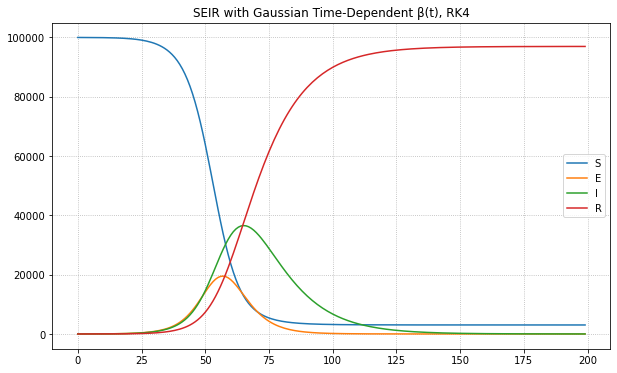

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t), RK4")
plt.grid(True, linestyle=":")
plt.show()

# SEIR Gaussian $\beta(t)$, RK2 method

In [36]:
def SEIRRK2_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    dt = 1
    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Conditions
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    for i in range(nbjours - 1):

        t = i * dt
        b1 = beta_func(t)          # beta for k1
        b2 = beta_func(t + dt)     # beta for k2

        # --- k1 ---
        k1_S = (-b1 * S[i] * I[i]) / N * dt
        k1_E = (b1 * S[i] * I[i] / N - sigma * E[i]) * dt
        k1_I = (sigma * E[i] - gamma * I[i]) * dt
        k1_R = (gamma * I[i]) * dt

        # U + k1
        S_k1 = S[i] + k1_S
        E_k1 = E[i] + k1_E
        I_k1 = I[i] + k1_I
        R_k1 = R[i] + k1_R

        # --- k2 ---
        k2_S = (-b2 * S_k1 * I_k1) / N * dt
        k2_E = (b2 * S_k1 * I_k1 / N - sigma * E_k1) * dt
        k2_I = (sigma * E_k1 - gamma * I_k1) * dt
        k2_R = (gamma * I_k1) * dt

        # --- Update ---
        S[i+1] = S[i] + 0.5 * (k1_S + k2_S)
        E[i+1] = E[i] + 0.5 * (k1_E + k2_E)
        I[i+1] = I[i] + 0.5 * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * (k1_R + k2_R)

    return S, E, I, R

In [37]:
S, E, I, R = SEIRRK2_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0)

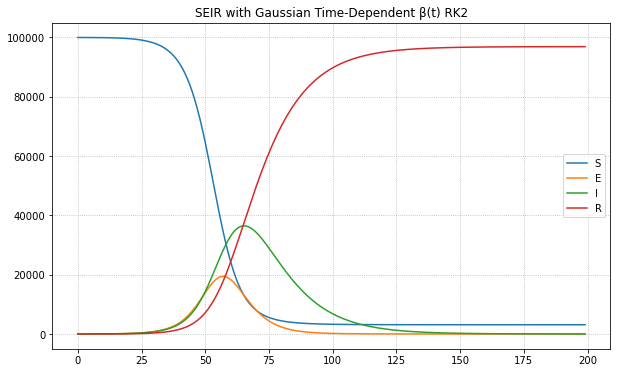

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t) RK2")
plt.grid(True, linestyle=":")
plt.show()

# SEIR Gaussian $\beta(t)$, Modified Euler method

In [39]:
def seir_model_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0=0):

    # Creation of lists
    S = np.zeros(nbjours)
    E = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    # Initial Condition
    I[0] = i0
    E[0] = e0
    R[0] = 0
    S[0] = N - i0 - e0 - R[0]

    # Propagation
    for i in range(nbjours - 1):

        t = i
        beta = beta_func(t)

        S[i+1] = S[i] - beta * I[i] * S[i] / N
        E[i+1] = E[i] + beta * I[i] * S[i] / N - sigma * E[i]
        I[i+1] = I[i] + sigma * E[i] - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]

    return S, E, I, R

In [40]:
S, E, I, R = seir_model_time_dependent_beta(i0, N, nbjours, beta_func, sigma, gamma, e0)

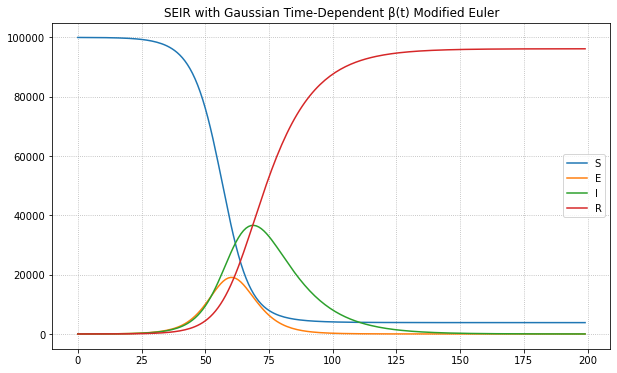

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(S, label="S")
plt.plot(E, label="E")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.legend()
plt.title("SEIR with Gaussian Time-Dependent β(t) Modified Euler")
plt.grid(True, linestyle=":")
plt.show()

# Comparing efficiency

In [42]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, E, I, R = solver(i0, N, nbjours, beta_func, sigma, gamma, e0=0)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SEIRRK4_time_dependent_beta)
time_solver("RK2", SEIRRK2_time_dependent_beta)
time_solver("Modified Euler", seir_model_time_dependent_beta)

RK4 time: 0.015870 seconds
RK2 time: 0.004839 seconds
Modified Euler time: 0.002457 seconds


# Sinusoidal time-dependent $\beta$

Using data from pages 334-335 of chapter 9 from: Brauer F, Castillo-Chavez C, Feng Z. Models for Influenza. Mathematical Models in Epidemiology. 2019 Jun 25;69:311–50. doi: 10.1007/978-1-4939-9828-9_9. PMCID: PMC7316090.

In [43]:
gamma=1/10

#defining beta as a sinusoidal function of time
#beta0 is mean contact rate, beta1 is 'amplitude of seasonality'

def make_beta_func(beta0, beta1):
    beta0 = float(beta0)
    beta1 = float(beta1)

    def beta(t):
        return beta0 * (1 + beta1 * np.cos(np.pi * t * 2))

    return beta

beta0 = 1.56
beta1 = 0.54 #these values taken from Models for Influenza chapter

beta_func = make_beta_func(beta0, beta1)

# Plotting $\beta$

$\beta$(t) is the time-dependent transmission rate of a disease, and represents how many infections each infected person produces per unit time.  
$\beta_0$ is the average transmission rate of a disease; a higher $\beta_0$ represents a more infectious disease.  
$\beta_1$ is the amplitude of seasonal variation; large $\beta_1$ means a drastic change in infectivity of a disease depending on time (e.g. time of year).  
The periodic oscillation has a unit of time that depends on the disease/over what length of time we are inspecting (1 unit = 1 year → yearly seasonal forcing; 1 unit = 1 day → daily cycles).

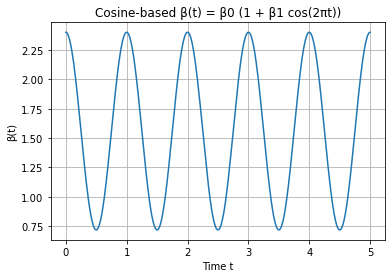

In [44]:
t = np.linspace(0, 5, 500)

# Compute beta values
beta_vals = beta_func(t)

plt.plot(t, beta_vals)
plt.title("Cosine-based β(t) = β0 (1 + β1 cos(2πt))")
plt.xlabel("Time t")
plt.ylabel("β(t)")
plt.grid(True)
plt.show()

# SIR cosine $\beta$(t), RK4 method #

In [45]:
def SIRK4_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        # beta values for RK4 stages
        b1 = beta_func(t)
        b2 = beta_func(t + 0.5 * dt)
        b3 = b2
        b4 = beta_func(t + dt)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # k2
        S2 = S[i] + 0.5 * dt * k1_S
        I2 = I[i] + 0.5 * dt * k1_I
        R2 = R[i] + 0.5 * dt * k1_R

        k2_S = (-b2 * S2 * I2) / N
        k2_I = (b2 * S2 * I2) / N - gamma * I2
        k2_R = gamma * I2

        # k3
        S3 = S[i] + 0.5 * dt * k2_S
        I3 = I[i] + 0.5 * dt * k2_I
        R3 = R[i] + 0.5 * dt * k2_R

        k3_S = (-b3 * S3 * I3) / N
        k3_I = (b3 * S3 * I3) / N - gamma * I3
        k3_R = gamma * I3

        # k4
        S4 = S[i] + dt * k3_S
        I4 = I[i] + dt * k3_I
        R4 = R[i] + dt * k3_R

        k4_S = (-b4 * S4 * I4) / N
        k4_I = (b4 * S4 * I4) / N - gamma * I4
        k4_R = gamma * I4

        # Update
        S[i+1] = S[i] + dt*(k1_S + 2*k2_S + 2*k3_S + k4_S)/6
        I[i+1] = I[i] + dt*(k1_I + 2*k2_I + 2*k3_I + k4_I)/6
        R[i+1] = R[i] + dt*(k1_R + 2*k2_R + 2*k3_R + k4_R)/6

    return S, I, R

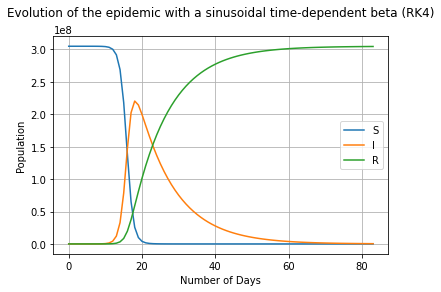

In [46]:
N = 305000000 #population of the US
i0 = 10
nbjours = 84

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title(f"Evolution of the epidemic with a sinusoidal time-dependent beta (RK4)", pad = 20)
plt.show()

# SIR cosine $\beta$(t), RK2 method #

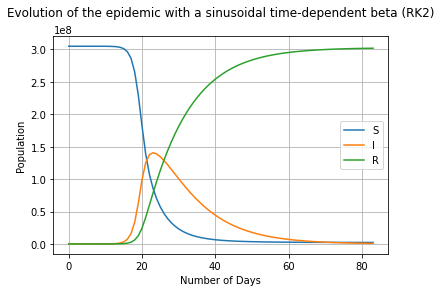

In [47]:
def SIRK2_time_dependent_beta(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # k1
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        # midpoint estimates
        S_mid = S[i] + 0.5 * dt * k1_S
        I_mid = I[i] + 0.5 * dt * k1_I
        R_mid = R[i] + 0.5 * dt * k1_R

        b_mid = beta_func(t + 0.5 * dt)

        # k2 (midpoint slope)
        k2_S = (-b_mid * S_mid * I_mid) / N
        k2_I = (b_mid * S_mid * I_mid) / N - gamma * I_mid
        k2_R = gamma * I_mid

        # Update (RK2)
        S[i+1] = S[i] + dt * k2_S
        I[i+1] = I[i] + dt * k2_I
        R[i+1] = R[i] + dt * k2_R

    return S, I, R

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a sinusoidal time-dependent beta (RK2)", pad=20)
plt.show()

# SIR cosine $\beta$(t), Modified Euler method #

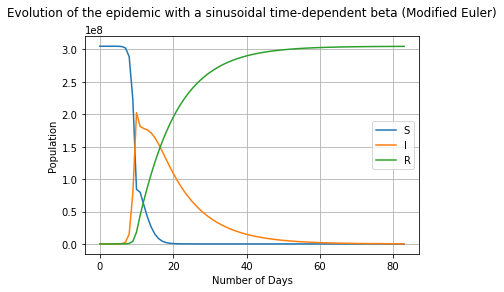

In [48]:
def SIR_modified_euler(i0, N, nbjours, beta_func):

    dt = 1
    S = np.zeros(nbjours)
    I = np.zeros(nbjours)
    R = np.zeros(nbjours)

    S[0] = N - i0
    I[0] = i0
    R[0] = 0

    for i in range(nbjours - 1):
        t = i * dt

        b1 = beta_func(t)

        # Modified Euler implementation
        k1_S = (-b1 * S[i] * I[i]) / N
        k1_I = (b1 * S[i] * I[i]) / N - gamma * I[i]
        k1_R = gamma * I[i]

        S_pred = S[i] + dt * k1_S
        I_pred = I[i] + dt * k1_I
        R_pred = R[i] + dt * k1_R

        b2 = beta_func(t + dt)

        # updating
        k2_S = (-b2 * S_pred * I_pred) / N
        k2_I = (b2 * S_pred * I_pred) / N - gamma * I_pred
        k2_R = gamma * I_pred

        S[i+1] = S[i] + 0.5 * dt * (k1_S + k2_S)
        I[i+1] = I[i] + 0.5 * dt * (k1_I + k2_I)
        R[i+1] = R[i] + 0.5 * dt * (k1_R + k2_R)

    return S, I, R

beta_func = make_beta_func(beta0, beta1)

S, I, R = SIR_modified_euler(i0, N, nbjours, beta_func)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.grid(True)
plt.xlabel("Number of Days")
plt.ylabel("Population")
plt.title("Evolution of the epidemic with a sinusoidal time-dependent beta (Modified Euler)", pad=20)
plt.show()

# Comparing three methods' efficiency

In [49]:
def time_solver(name, solver):
    start = time.perf_counter()
    S, I, R = solver(i0, N, nbjours, beta_func)
    end = time.perf_counter()
    print(f"{name} time: {end - start:.6f} seconds")

# comparing three methods
time_solver("RK4", SIRK4_time_dependent_beta)
time_solver("RK2", SIRK2_time_dependent_beta)
time_solver("Modified Euler", SIR_modified_euler)

RK4 time: 0.004552 seconds
RK2 time: 0.002099 seconds
Modified Euler time: 0.001741 seconds


# Comparing numerical methods

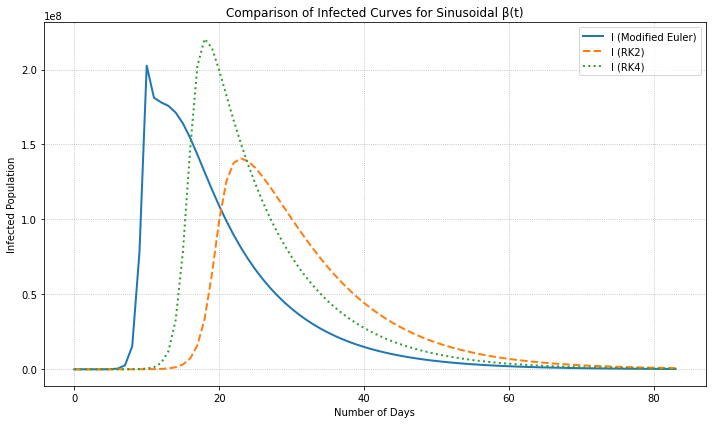

In [50]:
S_eu, I_eu, R_eu = SIR_modified_euler(i0, N, nbjours, beta_func)
S_rk2, I_rk2, R_rk2 = SIRK2_time_dependent_beta(i0, N, nbjours, beta_func)
S_rk4, I_rk4, R_rk4 = SIRK4_time_dependent_beta(i0, N, nbjours, beta_func)

plt.figure(figsize=(10, 6))

plt.plot(I_eu, label="I (Modified Euler)", linewidth=2)
plt.plot(I_rk2, label="I (RK2)", linestyle="--", linewidth=2)
plt.plot(I_rk4, label="I (RK4)", linestyle=":", linewidth=2)

plt.xlabel("Number of Days")
plt.ylabel("Infected Population")
plt.title("Comparison of Infected Curves for Sinusoidal β(t)")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

# 1. Fitting of time-dependant beta (cosine) to real data

To fit the data, a data sample from the years 2009-2012 of Influenza recorded by the WHO for France was used. The data can be found here:

https://app.powerbi.com/view?r=eyJrIjoiNjViM2Y4NjktMjJmMC00Y2NjLWFmOWQtODQ0NjZkNWM1YzNmIiwidCI6ImY2MTBjMGI3LWJkMjQtNGIzOS04MTBiLTNkYzI4MGFmYjU5MCIsImMiOjh9

- **Seasonal Transmission ($\beta(t)$):** The average transmission rate $\beta_0$ is modulated by a cosine function to account for yearly seasonality, driving the timing and width of the peaks.
    $$\beta(t) = \beta_0 \cdot \left(1 + A_{\beta} \cos(\omega t + \phi_{\beta})\right)$$

- **Reporting ($\rho(t)$):** The reporting fraction is also modeled seasonally. This is essential for accurately fitting, as surveillance efficiency often changes with the season or (weekly) case volume.

- **Waning Immunity ($\xi$):** The rate $\xi$ controls the flow of individuals from the Recovered ($R$) compartment back to the Susceptible ($S$) compartment, for modeling long-term, recurrent waves.

- **Solver:** A robust **RK4** numerical integrator is used to solve the ODEs.
- Optimization minimizes the **Log-Scaled Sum of Squared Errors (SSE)**.
    $$\text{SSE} = \sum_{t} \left[ \log(\text{Modeled Cases}_t + 1) - \log(\text{Observed Cases}_t + 1) \right]^2$$
    
Disclaimer: running the global optimization can take a while

Loading data from 7bohjaiU(2).csv...
Loaded 232 weeks of data. Max cases: 1358.
Starting SEIRS Global Optimization (RK4 Solver)...
differential_evolution step 1: f(x)= 842.53
differential_evolution step 2: f(x)= 325.611
differential_evolution step 3: f(x)= 325.611
differential_evolution step 4: f(x)= 283.007
differential_evolution step 5: f(x)= 269.939
differential_evolution step 6: f(x)= 248.265
differential_evolution step 7: f(x)= 248.265
differential_evolution step 8: f(x)= 185.045
differential_evolution step 9: f(x)= 185.045
differential_evolution step 10: f(x)= 185.045
differential_evolution step 11: f(x)= 179.798
differential_evolution step 12: f(x)= 179.798
differential_evolution step 13: f(x)= 179.798
differential_evolution step 14: f(x)= 176.551
differential_evolution step 15: f(x)= 176.551
differential_evolution step 16: f(x)= 176.551
differential_evolution step 17: f(x)= 176.551
differential_evolution step 18: f(x)= 176.551
differential_evolution step 19: f(x)= 171.484
diffe

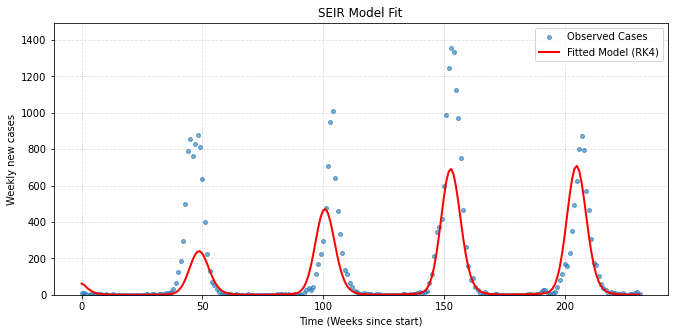

In [57]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

#start by defining rk4 solver fucntion
def rk4_solve(func, y0, t_eval, args=(), dt=0.5):
    #Solves ODE using RK4
    y = np.array(y0)
    results = [y]
    current_t = t_eval[0]
    
    for next_t in t_eval[1:]:
        
        while current_t < next_t:
            step = next_t - current_t if (current_t + dt > next_t) else dt
            h = step #step size RK4

            # RK4 Steps
            k1 = np.array(func(y, current_t, *args)) * h
            k2 = np.array(func(y + k1 * 0.5, current_t + h * 0.5, *args)) * h
            k3 = np.array(func(y + k2 * 0.5, current_t + h * 0.5, *args)) * h
            k4 = np.array(func(y + k3, current_t + h, *args)) * h
            
            # Weighted average update
            y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
            current_t += step
            
        results.append(y)
        
    return np.array(results)

#definition of SEIR model
def seirs_model_derivs_weekly(y, t, beta0, amplitude, phase, gamma, sigma, xi, N):
    # Rates per week.
    S, E, I, R = y
    T_w = 365.25 / 7.0 #conversion to weekly
    
    # seasonal beta(t)
    beta_t = beta0 * (1 + amplitude * np.cos((2 * np.pi / T_w * t) + phase))
    beta_t = max(0.0, beta_t) 
    
    # SEIR Equations
    dSdt = -beta_t * S * I / N + xi * R
    dEdt = beta_t * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I - xi * R
    
    return [dSdt, dEdt, dIdt, dRdt]

#cost function (using SSE (sum squared errors)) htat we want to minimize
def fit_seirs_log_scaled_weekly(params, data_obs, t_data, N_total):
    #Calculates the SSE using Weekly data with time-dependent rho.
    #params: [beta0, A, phi_beta, gamma, sigma, xi, rho0, rho_A, rho_phi, I0_ratio]

    # unpacking the parameters
    beta0, amplitude, phase, gamma, sigma, xi, rho0, rho_amplitude, rho_phase, I0_ratio = params

#   if not all(p > 1e-10 for p in [gamma, sigma, rho0, beta0]) or amplitude > 1.0 or rho_amplitude > 1.0:
#       return 1e30

    #initial conditions
    I0 = max(1.0, I0_ratio * N_total)
    beta_t0 = beta0 * (1 + amplitude * np.cos(phase))
    beta_t0 = max(1e-10, beta_t0)
    E0_derived = (beta_t0 * I0 * N_total) / (sigma * N_total)
    E0 = max(1.0, E0_derived) 
    S0 = max(0.0, N_total - E0 - I0)
    y0 = [S0, E0, I0, 0.0]
    
    # solve with rk4
    solution = rk4_solve(
        seirs_model_derivs_weekly, 
        y0, 
        t_data,
        args=(beta0, amplitude, phase, gamma, sigma, xi, N_total),
        dt=0.5 # time step for RK4
    )
    
#   if not solution.size or np.any(~np.isfinite(solution)):
#       return 1e30

    E_at_tdata = solution[:, 1]
    
    T_w = 365.25 / 7.0 #convert to weekly
    #time dependant reporting factor/parameter rho
    # rho(t) = rho0 * (1 + rho_amplitude * cos(seasonal_term + rho_phase))
    rho_t = rho0 * (1 + rho_amplitude * np.cos((2 * np.pi / T_w * t_data) + rho_phase))
    rho_t = np.maximum(rho_t, 1e-10) 
    
    # Modeled New weekly Cases (uses time-varying rho_t)
    modeled_new = rho_t * sigma * E_at_tdata
    modeled_new = np.maximum(modeled_new, 1e-10) 
    
    # log Transformation and SSE calculation
    log_data = np.log(data_obs + 1.0)
    log_modeled = np.log(modeled_new + 1.0)

    sse = np.sum((log_modeled - log_data)**2)
    
    if I0_ratio > 1e-4: 
        sse += 100 * I0_ratio 

    return sse

def run_weekly_seirs_fit(csv_path, N_total=67_000_000, plot=True):
    
    print(f"Loading data from {csv_path}...")

    df = pd.read_csv(csv_path) #reading in data from csv file
    
    col_week = 'ISO_WEEK' #column in csv with the number of weeks (starting from 2009)
    col_cases = 'INF_ALL' #corresponding data for the week (weey reported cases)

    obs_cases = df[col_cases].values.astype(float)
    num_weeks = len(obs_cases)
    t_data = np.arange(num_weeks).astype(float)
    
    print(f"Loaded {num_weeks} weeks of data. Max cases: {np.max(obs_cases):.0f}.")
        
    #optimization Bounds
    bounds = [
        (1.2, 1.8),          # 0: beta0 (Avg Transmission Rate)
        (0.4, 0.7),          # 1: amplitude (Beta Seasonality)
        (-np.pi, np.pi),     # 2: phase (Beta Seasonality Phase)
        (0.5, 3.5),          # 3: gamma (Recovery Rate)
        (0.5, 4.5),          # 4: sigma (Incubation Rate)
        (0.002, 0.009),      # 5: xi (Waning Immunity Rate)
        (1e-5, 0.05),        # 6: rho0 (Average Reporting Fraction)
        (0.0, 0.9),          # 7: rho_amplitude (Rho Seasonality Amplitude - NEW)
        (-np.pi, np.pi),     # 8: rho_phase (Rho Seasonality Phase - NEW)
        (1e-8, 1e-4),        # 9: I0_ratio 
    ]
#starting the optimization, prints SSE for each iteration:
    print(f"Starting SEIRS Global Optimization (RK4 Solver)...")
    
    #using global optimization
    opt_res = differential_evolution(fit_seirs_log_scaled_weekly,bounds, args=(obs_cases, t_data, N_total),strategy='best1bin',
        maxiter=60,#maximum number of iterations (stop optimization)
        popsize=15, 
        tol=1e-5, #tolerance that would be good
        disp=True,
    )
    
    if not opt_res.success:
        print("\nOptimization did not converge:", opt_res.message) #means tolerance was not met (maximum iterations reached)
    else:
        print("\nGlobal Optimization Successful!") #means tolerance was reached

    # rerunning solver with fitted params for plotting
    fitted = opt_res.x
    
    beta0_fit, amp_fit, phase_fit, gamma_fit, sigma_fit, xi_fit, rho0_fit, rho_amp_fit, rho_phase_fit, I0r_fit = fitted
    I0_fit = max(1.0, I0r_fit * N_total)
    T_w = 365.25 / 7.0
    beta_t0_fit = beta0_fit * (1 + amp_fit * np.cos(phase_fit))
    E0_fit = (beta_t0_fit * I0_fit * N_total) / (sigma_fit * N_total) 
    S0_fit = max(0.0, N_total - E0_fit - I0_fit)
    y0_fit = [S0_fit, E0_fit, I0_fit, 0.0]
    params_fit_ode = (beta0_fit, amp_fit, phase_fit, gamma_fit, sigma_fit, xi_fit, N_total)

    # solving with RK4:
    sol_fit = rk4_solve(
        seirs_model_derivs_weekly, y0_fit, t_data, args=params_fit_ode, dt=0.05
    )
    
    E_fit = sol_fit[:, 1]
    
    # calculating final rho(t) for plotting
    rho_t_fit = rho0_fit * (1 + rho_amp_fit * np.cos((2 * np.pi / T_w * t_data) + rho_phase_fit))

    modeled_cases_fit = rho_t_fit * sigma_fit * E_fit
    
    # printing parameters of the fit
    print("Fitted Parameters:")
    print(f"  beta0 (Avg Transmission): {beta0_fit:.4f}")
    print(f"  rho0 (Avg Reporting): {rho0_fit:.2e}")
    print(f"  sigma: {sigma_fit:.4f}")
    print(f"  amplitude: {amp_fit:.4f}")
    print(f"  gamma: {gamma_fit:.4f}")
    print(f"  rho_amplitude: {rho_amp_fit:.4f}")
    print(f"  SSE: {opt_res.fun:.2f}")

    # plotting the results
    if plot:
        plt.figure(figsize=(11, 5))
        plt.plot(t_data, obs_cases, '.', color='C0', label='Observed Cases', markersize=8, alpha=0.6)
        plt.plot(t_data, modeled_cases_fit, '-', color='red', label='Fitted Model (RK4)', linewidth=2)
        
        plt.title('SEIR Model Fit')
        plt.xlabel('Time (Weeks since start)')
        plt.ylabel('Weekly new cases')
        
        max_y = np.nanmax(np.concatenate([obs_cases, modeled_cases_fit[~np.isnan(modeled_cases_fit)]]))
        plt.ylim(0, max_y * 1.1)
        plt.grid(alpha=0.4, linestyle='--')
        plt.legend()
        plt.savefig('seirs_fit_results.jpg',dpi=300)
        plt.show()
        
    return opt_res

csv_filename = '7bohjaiU(2).csv' 
TOTAL_POPULATION = 67_000_000

if __name__ == "__main__":
    run_weekly_seirs_fit(csv_path=csv_filename, N_total=TOTAL_POPULATION)

## 2. Spatial SIR

Simulates the spread of an infectious disease on a two-dimensional grid using a **Stochastic Cellular Automaton** based on the classic **SIR** model.

The simulation tracks the state of each individual (cell) over time, considering only LOCAL interactions. 

- **Grid:** The simulation space is a $50 \times 50$ grid (here) where each cell represents an individual and can be in one of three states:
    * **0:** **Susceptible** ($S$)
    * **1:** **Infected** ($I$)
    * **2:** **Recovered** ($R$)

- **Infection ($\beta$):** A susceptible cell ($S$) is infected by an adjacent infected neighbor ($I$). The probability of a single neighbor causing an infection in a time step is $\beta$. The overall infection probability from multiple neighbors is calculated as:
    $$P_{\text{infection}} = 1 - (1 - \beta)^{N_I}$$
    where $N_I$ is the number of infected neighbors.

- **Recovery ($\gamma$):** An infected cell ($I$) recovers and moves to the recovered state ($R$) with a fixed probability $\gamma$ in each time step.
    $$P_{\text{recovery}} = \gamma$$

This model is entirely **stochastic**; transitions between states are determined by random chance based on these probabilities, leading to this realistic, irregular spread pattern. It is used to visualize the ide behind the SIR ODEs (and later the adjustments like vaccination etc to the simple SIR model)

In [58]:
pip install matplotlib pillow ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=23ca3f6a30313f82cdacd8d2a41562c5bea5c16d992c73e09359709c837f3072
  Stored in directory: /Users/maxinephillips/Library/Caches/pip/wheels/30/33/46/5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


### 2.1 SIR model, one starting point

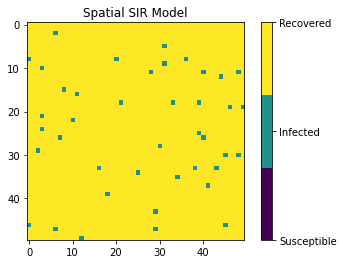

In [59]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#Parameters
grid_size = 50
beta = 0.3     # infection probability per neighbor
gamma = 0.05   # recovery probability per time step
days = 100

# 0 = Susceptible, 1 = Infected, 2 = Recovered
grid = np.zeros((grid_size, grid_size), dtype=int)

# Initial infected
mid = grid_size // 2
grid[mid, mid] = 1

# set up for the animation
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis', 3)  # 3 discrete colors
im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.set_title('Spatial SIR Model')

# colorbar as a legend
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Susceptible', 'Infected', 'Recovered'])

def count_infected_neighbors(x, y, grid):
    #Count how many neighbors are infected
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y) and grid[i, j] == 1:
                count += 1
    return count

def update(frame):
    global grid
    new_grid = grid.copy()
    
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # susceptible
                infected_neighbors = count_infected_neighbors(i, j, grid)
                if infected_neighbors > 0:
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_grid[i, j] = 1
            elif grid[i, j] == 1:  # infected
                if np.random.rand() < gamma:
                    new_grid[i, j] = 2  # recover

    grid = new_grid
    im.set_data(grid)
    return [im]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

### 2.2 Spatial SIR, 2 starting points

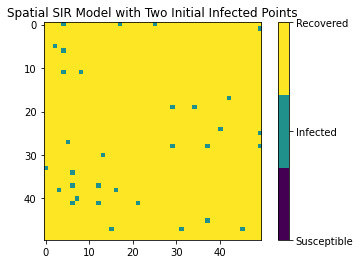

In [60]:
from matplotlib.animation import FuncAnimation, PillowWriter
#same as above, modified for 2 initial positions on grid
#parameters
grid_size = 50
beta = 0.45
gamma = 0.05
days = 100

# 0 = Susceptible, 1 = Infected, 2 = Recovered
grid = np.zeros((grid_size, grid_size), dtype=int)

# Initial infected points
initial_infected = [(grid_size//3, grid_size//3), (2*grid_size//3, 2*grid_size//3)] #2 starting points
for x, y in initial_infected:
    grid[x, y] = 1

fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis', 3)
im = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.set_title('Spatial SIR Model with Two Initial Infected Points')

# Colorbar as legend
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Susceptible', 'Infected', 'Recovered'])

def count_infected_neighbors(x, y, grid):
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y) and grid[i, j] == 1:
                count += 1
    return count

def update(frame):
    global grid
    new_grid = grid.copy()
    
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 0:  # susceptible
                infected_neighbors = count_infected_neighbors(i, j, grid)
                if infected_neighbors > 0:
                    if np.random.rand() < 1 - (1 - beta)**infected_neighbors:
                        new_grid[i, j] = 1
            elif grid[i, j] == 1:  # infected
                if np.random.rand() < gamma:
                    new_grid[i, j] = 2  # recover

    grid = new_grid
    im.set_data(grid)
    return [im]

# Save animation as GIF
#ani.save("animation.gif", writer=PillowWriter(fps=100))
ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

### 2.3 SIRVD model: effect of vaccination

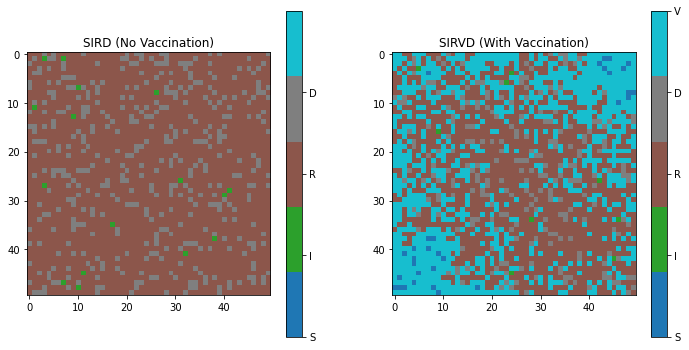

In [61]:
# parameters
grid_size = 50
beta = 0.3        # infection probability per infected neighbor
gamma = 0.05      # recovery parameter
mu = 0.01         # death probability
vaccine_rate = 0.02  # for SIRVD
days = 100

initial_infected = [(25,25), (35,35)]#starting points on grid

#Function to initialize grid 
def init_grid(vaccination=False):
    # 0=S, 1=I, 2=R, 3=D, 4=V (V only if vaccination=True)
    grid = np.zeros((grid_size, grid_size), dtype=int)
    for x, y in initial_infected:
        grid[x, y] = 1
    return grid

#Count infected neighbors
def infected_neighbors(x, y, grid):
    count = 0
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i,j)!=(x,y) and grid[i,j]==1:
                count +=1
    return count

# update function, now including vaccination and dead
def update_grid(grid, vaccination=False):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i,j]==0:  # Susceptible
                if vaccination and np.random.rand() < vaccine_rate:
                    new_grid[i,j] = 4  # Vaccinated
                else:
                    if infected_neighbors(i,j,grid) > 0:
                        if np.random.rand() < 1 - (1-beta)**infected_neighbors(i,j,grid):
                            new_grid[i,j] = 1
            elif grid[i,j]==1:  # Infected
                if np.random.rand() < mu:
                    new_grid[i,j] = 3  # Dead
                elif np.random.rand() < gamma:
                    new_grid[i,j] = 2  # Recovered
    return new_grid

#Initialize grids
grid_sird = init_grid(vaccination=False)
grid_sirvd = init_grid(vaccination=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
cmap = plt.get_cmap('tab10', 5)

im1 = ax1.imshow(grid_sird, cmap=cmap, vmin=0, vmax=4)
ax1.set_title('SIRD (No Vaccination)')
cbar1 = plt.colorbar(im1, ax=ax1, ticks=[0,1,2,3])
cbar1.ax.set_yticklabels(['S','I','R','D'])

im2 = ax2.imshow(grid_sirvd, cmap=cmap, vmin=0, vmax=4)
ax2.set_title('SIRVD (With Vaccination)')
cbar2 = plt.colorbar(im2, ax=ax2, ticks=[0,1,2,3,4])
cbar2.ax.set_yticklabels(['S','I','R','D','V'])

def update(frame):
    global grid_sird, grid_sirvd
    grid_sird = update_grid(grid_sird, vaccination=False)
    grid_sirvd = update_grid(grid_sirvd, vaccination=True)
    im1.set_data(grid_sird)
    im2.set_data(grid_sirvd)
    return [im1, im2]

ani = FuncAnimation(fig, update, frames=days, interval=200, blit=True)
HTML(ani.to_jshtml())

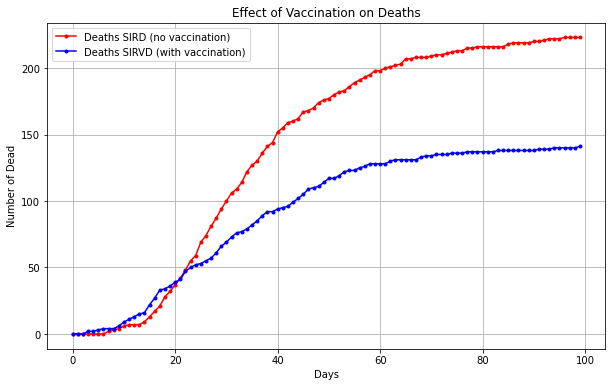

In [62]:
def run_sird_sim(grid_size=50, beta=0.3, gamma=0.05, mu=0.005, days=100, initial_infected=[(25,25)], vaccine_rate=0.0):
    # 0=S, 1=I, 2=R, 3=D, 4=V
    grid = np.zeros((grid_size, grid_size), dtype=int)
    for x, y in initial_infected:
        grid[x, y] = 1

    counts = {'S':[], 'I':[], 'R':[], 'D':[], 'V':[]}

    def infected_neighbors(x, y):
        count = 0
        for i in range(max(0, x-1), min(grid_size, x+2)):
            for j in range(max(0, y-1), min(grid_size, y+2)):
                if (i,j)!=(x,y) and grid[i,j]==1:
                    count +=1
        return count

    for _ in range(days):
        new_grid = grid.copy()
        for i in range(grid_size):
            for j in range(grid_size):
                if grid[i,j]==0:  # S
                    if np.random.rand() < vaccine_rate:
                        new_grid[i,j] = 4
                    else:
                        if infected_neighbors(i,j) > 0:
                            if np.random.rand() < 1 - (1-beta)**infected_neighbors(i,j):
                                new_grid[i,j] = 1
                elif grid[i,j]==1:  # I
                    if np.random.rand() < mu:
                        new_grid[i,j] = 3
                    elif np.random.rand() < gamma:
                        new_grid[i,j] = 2
        grid = new_grid
        # count
        counts['S'].append(np.sum(grid==0))
        counts['I'].append(np.sum(grid==1))
        counts['R'].append(np.sum(grid==2))
        counts['D'].append(np.sum(grid==3))
        counts['V'].append(np.sum(grid==4))
    return counts

days = 100
initial_infected = [(25,25), (35,35)] #starting points of infected (2 points)
sird_counts = run_sird_sim(days=days, initial_infected=initial_infected, vaccine_rate=0.0)
sirvd_counts = run_sird_sim(days=days, initial_infected=initial_infected, vaccine_rate=0.02)

plt.figure(figsize=(10,6))
plt.plot(sird_counts['D'], 'r-o', label='Deaths SIRD (no vaccination)',markersize=3)     
plt.plot(sirvd_counts['D'], 'b-o', label='Deaths SIRVD (with vaccination)',markersize=3) 
plt.xlabel('Days')
plt.ylabel('Number of Dead')
plt.title('Effect of Vaccination on Deaths')
plt.grid(True)
plt.legend()
plt.show()

Data load : 1093 day.
12 vagues détectées.
R^2 = 0.8779
Graphique sauvegardé sous : resultat_covid_final.png


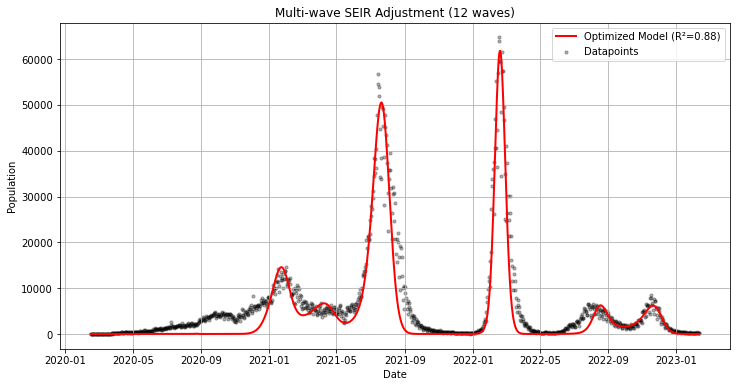

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
from scipy.signal import find_peaks




# --- CHARGEMENT ---
filename = 'Feuille de calcul sans titre - Feuille 1 (2) (1).csv'



def parse_french_date(date_str):
    replacements = {'janv.': 'Jan', 'févr.': 'Feb', 'mars': 'Mar', 'avr.': 'Apr', 
                    'mai': 'May', 'juin': 'Jun', 'juil.': 'Jul', 'août': 'Aug', 
                    'sept.': 'Sep', 'oct.': 'Oct', 'nov.': 'Nov', 'déc.': 'Dec'}
    for fr, en in replacements.items():
        if fr in date_str: date_str = date_str.replace(fr, en)
    return pd.to_datetime(date_str, format='%d-%b-%y')


df = pd.read_csv(filename)
df['Date'] = df['Day'].apply(parse_french_date)
df = df.sort_values('Date').reset_index(drop=True)
observed_data = np.maximum(df['Daily new confirmed cases of COVID-19'].values, 0)
days = np.arange(len(observed_data))
print(f"Data load : {len(days)} day.")

# model
N = 273523615
gamma = 0.0696
sigma = 0.6274
dt = 1

def run_seir_simulation(params, n_days):
    S = N - 100
    E = 0
    I = 100
    R = 0
    
    t_vals = np.arange(n_days)
    betas = np.zeros(n_days)
    num_waves = len(params) // 3
    
    # Beta
    for i in range(num_waves):
        r, tm, dm = params[3*i], params[3*i+1], params[3*i+2]
        
        dm = max(dm, 1.0) 
        betas += r * np.exp(-((t_vals - tm)**2) / (dm**2))
    
    predictions = np.zeros(n_days)
    
    # SEIR
    for t in range(n_days):
        beta = betas[t]
        
    
        S = max(0, S)
        I = max(0, I)
        
        new_inf = (beta * S * I / N) * dt
        
        S_next = S - new_inf
        E_next = E + new_inf - sigma * E * dt
        I_next = I + sigma * E * dt - gamma * I * dt
        R_next = R + gamma * I * dt
        
        # Simuled case per day
        predictions[t] = sigma * E * dt 
        
        S, E, I, R = S_next, E_next, I_next, R_next
        
    return predictions



def objective_function(x, observed_data): # function to optimize
    predictions = run_seir_simulation(x, len(observed_data))
    mse = np.mean((observed_data - predictions)**2)
    return mse

# search of peak

smoothed = pd.Series(observed_data).rolling(window=14, center=True).mean().fillna(0).values

peaks, _ = find_peaks(smoothed, height=500, distance=40)  # minimum height peak dectection , same for distance in number of day
print(f"{len(peaks)} vagues détectées.")


#definition of the bound that constrain the different value of r_m , t_m , d_m
x0 = []
bounds = []
for p in peaks:
    #inital random value of r_m , t_m , d_m
    x0.extend([0.2, float(p - 10), 30.0])
    bounds.append((0.01, 5.0))      # r
    bounds.append((0.0, len(days))) # t
    bounds.append((5.0, 300.0))     # d 

x0 = np.array(x0) #value of r_m , t_m , d_m



# #GRG method
x_opt, f_min, info_dict = fmin_l_bfgs_b(
    func=objective_function, # function to optimize
    x0=x0,
    args=(observed_data,),
    bounds=bounds,
    approx_grad=True,
    maxfun=50000,    # Maximum number of function evaluations 
    factr=0.0001,      # precision 
    disp=1
)



#run of the seir with good data
final_preds = run_seir_simulation(x_opt, len(days))

# R2
ss_res = np.sum((observed_data - final_preds)**2)
ss_tot = np.sum((observed_data - np.mean(observed_data))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R^2 = {r2:.4f}")
#plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], observed_data, color='black', s=10, alpha=0.3, label='Datapoints')
plt.plot(df['Date'], final_preds, color='red', linewidth=2, label=f'Optimized Model (R²={r2:.2f})')
plt.title(f"Multi-wave SEIR Adjustment ({len(peaks)} waves)")
plt.xlabel("Date")
plt.ylabel("Population")
plt.legend()
plt.grid(True)

output_file = 'resultat_covid_final.png'
plt.savefig(output_file)
print(f"Graphique sauvegardé sous : {output_file}")
plt.show()